## Heading

Regular text

**bold**

- bullet 1
- bullet 2

## iris dataset - supervised learning

Bunch - type set used by scikit that holds data sets and their attributes 
 - bunch.data calls the data
 - .feature_names calls the name of the features
 - .target calls the integers representing the species of each observation
 - .target_names calls what species the integers represent
 
Scikit-learn assumes that:
  1. features and response are separate objects
  2. features and response should be numeric
  3. features and response should be NumPy arrays
  4. features and response should have specific shapes
      Data shapes (m=# of observation, n=# of features)

In [177]:
#import load_iris function from datasets module
from sklearn.datasets import load_iris

In [178]:
iris = load_iris()
type(iris)

sklearn.datasets.base.Bunch

In [179]:
print iris.data

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [180]:
print iris.feature_names

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [181]:
print iris.target

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [182]:
print iris.target_names

['setosa' 'versicolor' 'virginica']


In [183]:
print type(iris.data)

<type 'numpy.ndarray'>


In [184]:
print iris.data.shape

(150, 4)


In [185]:
print iris.target.shape

(150,)


In [186]:
X=iris.data #Matrix
y=iris.target #vector

**step 1: Scikit-learn 4 step modeling pattern**

In [187]:
from sklearn.neighbors import KNeighborsClassifier

**step 2: Instantiate the estimator**

In [188]:
knn = KNeighborsClassifier(n_neighbors=1)

** step 3: Fit the model with data ("model training")**

In [189]:
print knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [190]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

**step 4: Predict the response for a new observation**

In [191]:
knn.predict([3,5,4,2]) #predicts virginica

/Users/HyunJooHwang/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([2])

In [192]:
X_new=[[3,5,4,2],[5,4,3,2]]
knn.predict(X_new)

array([2, 1])

In [193]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
knn.predict(X_new)

array([1, 1])

**these 4 step implementation is consistent along other fitting models**

In [194]:
#import the class
from sklearn.linear_model import LogisticRegression

#instantiate the model (using default parameters)
logreg = LogisticRegression()

#fit the model with data
logreg.fit(X,y)

#predict the response for new observations
logreg.predict(X_new)


array([2, 0])

## Evaluation procedure #1: Train and test on entire dataset (same set)
How do we know which model to use?

*This method is not useful for testing models*

In [195]:
#predict the y values for X (on the same data set)
y_pred = logreg.predict(X)

#compute classification accuracy for the logistic regression model
from sklearn import metrics
print metrics.accuracy_score(y,y_pred) #TRAINING ACCURACY b/c we are testing on training set

0.96


**KNN, k=5**

In [196]:
y_pred = knn.predict(X)
print metrics.accuracy_score(y,y_pred)

0.966666666667


**KNN, k=1** This will always overfit, give training accuracy of 1

In [197]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred=knn.predict(X)
print metrics.accuracy_score(y,y_pred)

1.0


## Evaluation procedure #2: Train/test split
Train the model on the training set and test the model on the testing set

In [198]:
print X.shape
print y.shape

(150, 4)
(150,)


In [199]:
#step 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=4) 
#                                           specifies seed for rng----------^

In [200]:
#step 2: train the model on the training set
logreg= LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [201]:
#step 3: make predictions on the testing set
y_pred=logreg.predict(X_test)

#compare values
print metrics.accuracy_score(y_test,y_pred)

0.95


**Repeat for KNN with k=5**

In [202]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print metrics.accuracy_score(y_test,y_pred)

0.966666666667


**Repeat for KNN with k=1**

In [203]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print metrics.accuracy_score(y_test,y_pred)

0.933333333333


Can we find an even better value for K? -> FOR LOOP

In [204]:
#try K=1 through K=25 and record testing accuracy
k_range = range(1,26)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

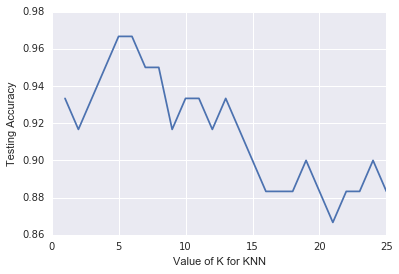

In [205]:
import matplotlib.pyplot as plt

#allow plots to appear within the notebok
%matplotlib inline

plt.plot(k_range,scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

**In general..**

-**Training accuracy** rises as model complexity increases (lower K = more complex)

-**Testing accuract** penalizes models that are too complex or not complex enough

train/test split provides a high-variance estimate of out-of-sample accuracy (highly dependent on random train sample)

but K-fold cross-validation overcomes this limitation

train/test split is still useful beacuse of its flexibility and speed

## Data science pipeline : pandas, seaborn, scikit-learn

**Reading data using pandas**

In [206]:
#import pandas
import pandas as pd

In [207]:
#read CSV file directly from a URL and save the results
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

#display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [208]:
#display the last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [209]:
data.shape

(200, 4)

## Visualizing data using seaborn
Python library for statistical data visualization built on top of Matplotlib

In [210]:
#import seaborn
import seaborn as sns

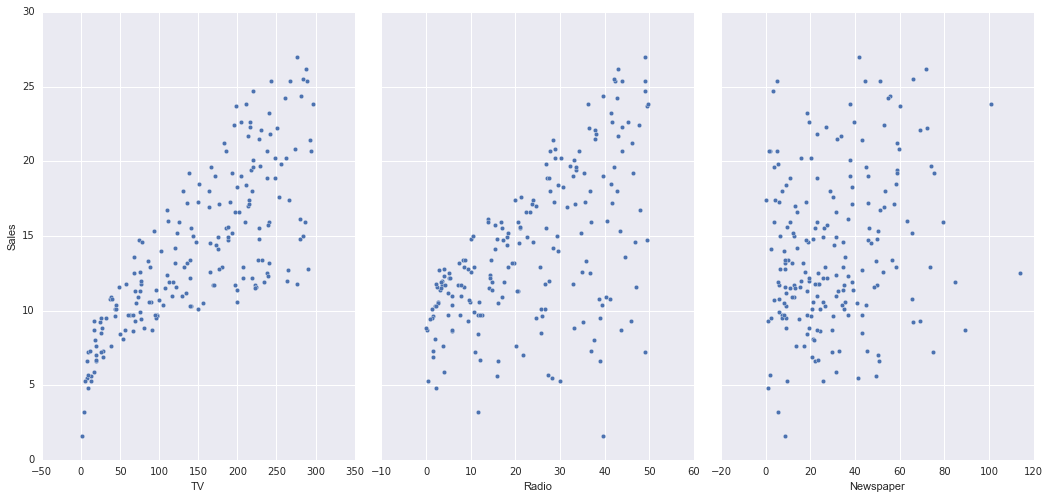

In [211]:
#visualize the relatoinship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)

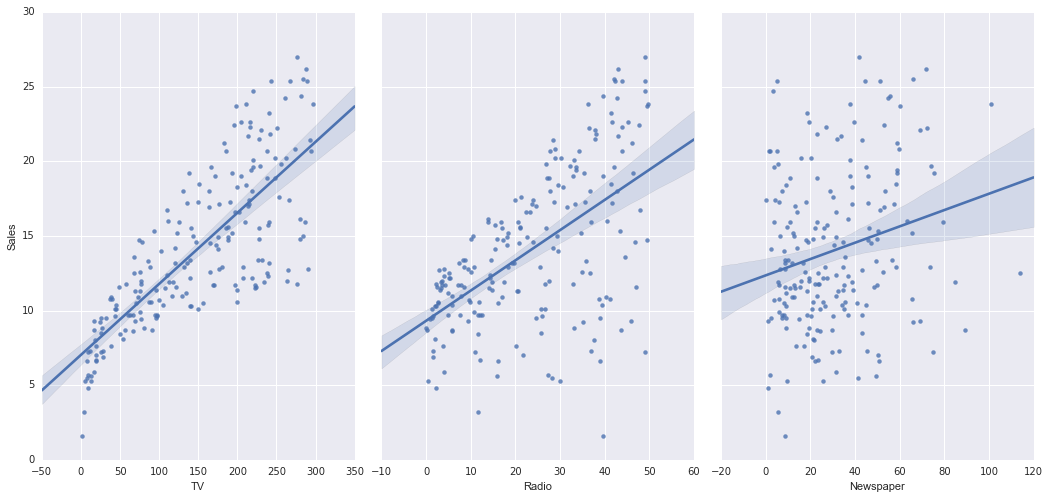

In [212]:
#visualize the relatoinship between the features and the response using scatterplots with 95% CFI best fit
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

## Preparing X and y using pandas

Scikit-learn expects X and y to be NumPy arrays and Pandas is built on Numpy so pandas data can be loaded into X and y

In [213]:
#create a Python list of feature names
feature_cols=['TV','Radio','Newspaper']

#use the list to select a subset of the original DataFrame
X=data[feature_cols] #telling panda that we want to use featurs cols to sub-select data

#print first 5 rows
print X.head()

      TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4


In [214]:
print type(X)
print X.shape

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [215]:
#select a series from the DataFrame
y=data['Sales'] #equivalent to y=data.Sales
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

## Splitting X and y into training and testing sets

In [216]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1) #default split is 0.75,0.25

## Linear regression in scikit-learn

In [217]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate
linreg=LinearRegression()

#fit the model
linreg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Interpreting model coefficients

In [218]:
#print the intercept and coefficients
print linreg.intercept_
print linreg.coef_

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [219]:
#pair the feature names with coefficients
zip(feature_cols, linreg.coef_)

[('TV', 0.046564567874150288),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111803788)]

## Making predictions

In [220]:
#make predictions on the testing set
y_pred=linreg.predict(X_test)

## Model evaluation metrics for regression

In [221]:
#define true and predicted response values
true = [100,50,30,20]
pred=[90,50,50,30]

import numpy as np
from sklearn import metrics
print metrics.mean_absolute_error(true,pred) #MAE
print metrics.mean_squared_error(true,pred)  #MSE
print np.sqrt(metrics.mean_squared_error(true,pred)) #RMSE

10.0
150.0
12.2474487139


In [222]:
print np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.40465142303


## Feature selection
Does 'Newspaper' belong in our model? Does it imporve the quality of our predictions?

In [223]:
feature_cols=['TV','Radio']
X=data[feature_cols]
y=data.Sales

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)

print np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.38790346994


the RMSE decreased when we removed Nespaper from the model. Thus, it is unlikely that this feature is useful for predicting  Sales, and should be removed from the model.

## Cross-validation for parameter tuning, model selection, and feature selection

**K-fold cross-validation**
1. Split the dataset into K equal partitions ("folds")
2. Use fold 1 as the testing set and the union of the other folds at the training set
3. Calculate testing accuracy
4. Repeat steps 2 and 3 K times using a different fold as the testing set each time
5. Use the average testing accuracy as the estimate of out-of-sample accuracy


- each response class should be represented with equal proportions in each of the K folds
- K=10 recommended
- each fold acts as the **testing** set **1** time and as a **training** set as **K-1** times

In [224]:
#simulate splitting a dataset of 25 observations into 5 folds
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=5, shuffle=False)

#print the contects of each training and testing set
print '{} {:^61} {}'.format('Iteration','Training set observations','Testing set observations')
for iteration, data in enumerate(kf, start=1):
    print '{:^9}{}{:^25}'.format(iteration,data[0], data[1])

Iteration                   Training set observations                   Testing set observations
    1    [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]       [0 1 2 3 4]       
    2    [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]       [5 6 7 8 9]       
    3    [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]    [10 11 12 13 14]     
    4    [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]    [15 16 17 18 19]     
    5    [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]    [20 21 22 23 24]     


## Cross-validation example: parameter tuning
**Goal**: Select the best tuning parameters for KNN on the iris dataset

In [225]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.datasets import load_iris

In [226]:
iris = load_iris()

X=iris.data
y=iris.target

In [227]:
#10-fold cross-validation with k=5 for KNN
knn = KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn, X, y, cv=10, scoring='accuracy') #accuracy for 10 cv examples

In [228]:
#out of sample accuracy
print scores.mean()

0.966666666667


**now we want to find optimal value of k for KNN**

In [229]:
k_range=range(1,31)
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print k_scores

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


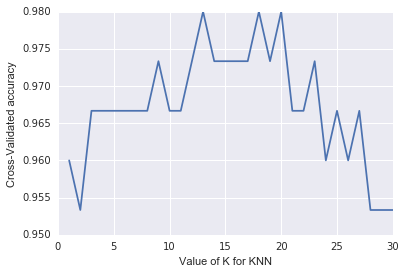

In [230]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated accuracy')

## Cross-validatione example: model selection
Compare the best KNN model with logistic regression on the iris dataset

In [231]:
#10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

0.98


In [232]:
#10-fold cross-validation with Logistic regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
print cross_val_score(logreg,X,y,cv=10,scoring='accuracy').mean()

0.953333333333


## Cross-validation example: feature selection

In [233]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [234]:
#read in the advertising dataset
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [235]:
feature_cols=['TV','Radio','Newspaper']
X=data[feature_cols]
y=data.Sales

In [236]:
#10-fold cross-validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X,y, cv=10, scoring='mean_squared_error')
print scores

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [237]:
#fix the sign of MSE scores and convert to RMSE
mse_scores = -scores
rmse_scores=np.sqrt(mse_scores)
print rmse_scores

[ 1.88689808  1.81595022  1.44548731  1.68069713  1.14139187  1.31971064
  2.85891276  1.45399362  1.7443426   1.56614748]


In [238]:
print rmse_scores.mean()

1.69135317081


In [239]:
#now, 10-fold cross-validation with two features (excluding Newspaper)
feature_cols=['TV','Radio']
X=data[feature_cols]
print np.sqrt(-cross_val_score(lm, X,y, cv=10, scoring='mean_squared_error')).mean()

1.67967484191


## More efficient parameter tuning using GridSearchCV
Allows you to define a **grid of parameters** that will be searched using K-fold cross-validation

In [240]:
from sklearn.grid_search import GridSearchCV

In [242]:
#define the parameter values that should be searched
k_range = range(1,31)
print k_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [243]:
#create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
